# MSDM5004 Homework 2

## 1. Write a code using to compute the derivative of 
$f(x) = \frac{\sin x}{x^3}$ at $x = 4$ using the central difference formula, and check the order of
convergence.

In [1]:
function central_diff(f::Function,x::Real,h::Real)
    return (f(x+h)-f(x-h))/2/h
end

central_diff (generic function with 1 method)

In [2]:
f(x) = sin(x)/x^3

f (generic function with 1 method)

In [3]:
v = central_diff(f,4,1e-3)
display("text/markdown","The derivative of f(x) at x=4 is $v")

The derivative of f(x) at x=4 is -0.0013444070485774812

Then let check the order of convergence:

In [4]:
n = 10
h₀ = 0.1
hs = h₀ * (1/2) .^ collect(0:(n-1))
phi = central_diff.(f,4,hs)
rs = (phi[1:end-2]-phi[2:end-1])./(phi[2:end-1]-phi[3:end])
for r in rs
    @show r
end

r = 4.002842241732386
r = 4.000710087426402
r = 4.000177492575602
r = 4.000044360840964
r = 4.000011257409564
r = 4.000002797273308
r = 3.999998456677391
r = 3.9999876534572376


## 2. Find the first two iterations using 
- (1) the Jacobi method
- (2) the Gauss-Seidel method 

for the following linear system, starting from $x^{(0)} = (0, 0, -1)$.

$$
\begin{aligned}
4x_1 −x_2 + x_3 &=3,\\
2x_1 + 5x_2 + 2x_3 &=4,\\
−x_1 + x_2 + 3x_3 &= −6.
\end{aligned}
$$

### Why I still use matrix form, instead of variables form mentioned in ppt?

There are mainly two reason:

First, those `Diagonal`, `LowerTrianular` and `UpperTriangular` matrix are sparse matrix, which means they have special data struct comparing with regular matrix. The 0 element in sparse matrix won't participate in calculation of matrix multiplication since those algorithm are optimized in julia.

Second, although `Gauss-Seidel` and `SOR` method can utilize the obtained calculation result in previous rows, this can only show advantage in `serial algorithm` with single cpu, not `parallel computation` with gpu devices. When we are carrying out parallel computation, the matrix form can show its advantage since its natural parallel attribute.

In [5]:
using LinearAlgebra

include("../utils/MatrixDisplay.jl")

function DLU(A::Matrix{<:Real})
    D = Diagonal(A)
    L = D-LowerTriangular(A)
    U = D-UpperTriangular(A)
    return D,L,U
end

DLU (generic function with 1 method)

In [6]:
A = [
    4 -1 1;
    2 5 2;
    -1 1 3
];
b = [3;4;-6];
x⁽⁰⁾ = [0;0;-1];

First of all, let's decompose matrix A into D,L,U

In [7]:
D,L,U=DLU(A);

In [8]:
@latex D

<center>$D=\begin{pmatrix}4&0&0\\0&5&0\\0&0&3\end{pmatrix}$</center>


In [9]:
@latex L

<center>$L=\begin{pmatrix}0&0&0\\-2&0&0\\1&-1&0\end{pmatrix}$</center>


In [10]:
@latex U

<center>$U=\begin{pmatrix}0&1&-1\\0&0&-2\\0&0&0\end{pmatrix}$</center>


### (1) Jacobi method

In [11]:
@latex Tⱼ = D^(-1)*(L+U)

<center>$Tⱼ=\begin{pmatrix}0.0&0.25&-0.25\\-0.4&0.0&-0.4\\0.3333333333333333&-0.3333333333333333&0.0\end{pmatrix}$</center>


In [12]:
@latex cⱼ = D^(-1)*b

<center>$cⱼ=\begin{pmatrix}0.75\\0.8\\-2.0\end{pmatrix}$</center>


In [13]:
@latex x⁽¹⁾ = Tⱼ*x⁽⁰⁾+cⱼ

<center>$x⁽¹⁾=\begin{pmatrix}1.0\\1.2000000000000002\\-2.0\end{pmatrix}$</center>


In [14]:
@latex x⁽²⁾ = Tⱼ*x⁽¹⁾+cⱼ

<center>$x⁽²⁾=\begin{pmatrix}1.55\\1.2000000000000002\\-2.066666666666667\end{pmatrix}$</center>


### (2) Gauss-Seidel method

In [15]:
@latex Tg = (D-L)^(-1)*U

<center>$Tg=\begin{pmatrix}0.0&0.25&-0.25\\0.0&-0.1&-0.30000000000000004\\0.0&0.11666666666666665&0.016666666666666677\end{pmatrix}$</center>


In [16]:
@latex cg = (D-L)^(-1)*b

<center>$cg=\begin{pmatrix}0.75\\0.5\\-1.9166666666666667\end{pmatrix}$</center>


In [17]:
@latex x⁽¹⁾=Tg*x⁽⁰⁾+cg

<center>$x⁽¹⁾=\begin{pmatrix}1.0\\0.8\\-1.9333333333333333\end{pmatrix}$</center>


In [18]:
@latex x⁽²⁾=Tg*x⁽¹⁾+cg

<center>$x⁽²⁾=\begin{pmatrix}1.4333333333333333\\1.0\\-1.8555555555555556\end{pmatrix}$</center>


## 3. Solve the following linear system using 
- (1) the Gauss-Seidel method,
- (2) the SOR method with ω =1.2. 

The initial estimate is $x^{(0)} = (0, 0, 1, 0)$. 

Stop the iterations until the $l_{\infty}$ norm
$||x^{(k)}-x^{(k-1)}||_{\infty} \leq 10^{-3}$.

$$
\begin{aligned}
4x_1 + x_2 -x_3 + x_4 &= -3,\\
x_1 + 4x_2 -x_3 -x_4 &= -2,\\
-x_1 -x_2 + 5x_3 + x_4 &=5,\\
x_1 -x_2 + x_3 + 3x_4 &=2.\\
\end{aligned}
$$

In [19]:
A = [
    4  1 -1  1;
    1  4 -1 -1;
   -1 -1  5  1;
    1 -1  1  3
];
b = [-3;-2;5;2];
x₀ = [0;0;1;0];

### (1) Gauss-Seidel method

In [20]:
function GaussSeidel(A,b,x₀;ϵ=1e-3,maxiter=1e4,norm=maximum)
    D,L,U=DLU(A)
    invDL = inv(D - L)
    T = invDL*U
    c = invDL*b
    for k in 1:maxiter
        x₁ = T*x₀ + c
        if norm(x₁-x₀) ≤ ϵ
            return x₁
        end
        x₀ = x₁
    end   
end

GaussSeidel (generic function with 1 method)

In [21]:
@latex xᵍ = GaussSeidel(A,b,x₀)

<center>$xᵍ=\begin{pmatrix}-0.7527255627893519\\0.040855425708911985\\0.7195080258246528\\0.691357654224537\end{pmatrix}$</center>


### (2) the SOR method

In [22]:
function SOR(A,b,x₀;ω=1.2,ϵ=1e-3,maxiter=1e4,norm=maximum)
    D,L,U=DLU(A)
    invDL = inv(D - ω*L)
    T = invDL*((1-ω)*D+ω*U)
    c = invDL*ω*b
    for k in 1:maxiter
        x₁ = T*x₀ + c
        if norm(x₁-x₀) ≤ ϵ
            return x₁
        end
        x₀ = x₁
    end   
end

SOR (generic function with 1 method)

In [23]:
@latex xˢ = SOR(A,b,x₀;ω=1.2)

<center>$xˢ=\begin{pmatrix}-0.7530897093888335\\0.04117280965301612\\0.7192518346947181\\0.6916350607145069\end{pmatrix}$</center>


## 4. Write codes to solve the ODE

$$
y^{'}= t^{-2} (ty-y^2), t\in[1, 3],
$$

with initial condition $y(1) = 2$, using the following three numerical schemes: 

- (1) forward Euler method, 
- (2) backward Euler method, 
- (3) 4-th order Runge-Kutta method.

Choose time step h = 1/128.

In [24]:
using DataFrames
y₁ = 2
t₁,tₙ = 1,3
h = 1/128
f(t,y) = t^(-2)*(t*y-y^2)

f (generic function with 2 methods)

### (1) forward Euler method

In [25]:
function forwardEuler(f,y₁,t₁,tₙ;h=1/128)
    t = t₁:h:tₙ
    n = length(t)
    y = [y₁;zeros(n-1)]
    for i in 1:(n-1)
        y[i+1] = y[i] + h*f(t[i],y[i])
    end
    return t,y
end

forwardEuler (generic function with 1 method)

In [26]:
t,yᶠᵉ = forwardEuler(f,y₁,t₁,tₙ;h=h);
DataFrame(t=t,y=yᶠᵉ)

Row,t,y
,Float64,Float64
1,1.0,2.0
2,1.00781,1.98438
3,1.01562,1.96947
4,1.02344,1.95524
5,1.03125,1.94165
6,1.03906,1.92867
7,1.04688,1.91625
8,1.05469,1.90438
9,1.0625,1.89301


### (2) backward Euler method

First of all, let's review what is backward Euler method.

$$
y_{i+1} = y_i+h f(t_{i+1},y_{i+1})
$$

which is implicit formula, so we should solve the explicit expression for $y_{i+1}$.

Solve it,

$$
y_{i+1}=\frac{-t(t-h)\pm\sqrt{t^2(t-h)^2+4ht^2y_i}}{2h}
$$

From analysis, we can assert that: the curve wouldn't cross $y=0$ when inital value $y(1)>0$.

Then, we can get explicit expression for $y_{i+1}$,

$$
y_{i+1}=\frac{-t(t-h)+\sqrt{t^2(t-h)^2+4ht^2y_i}}{2h}
$$

In [27]:
function backwardEuler(yf,y₁,t₁,tₙ;h=1/128)
    t = t₁:h:tₙ
    n = length(t)
    y = [y₁;zeros(n-1)]
    for i in 1:(n-1)
        y[i+1] = yf(t[i+1],y[i],h)
    end
    return t,y
end

backwardEuler (generic function with 1 method)

In [28]:
yf(t,y,h) = ((h-t)t+√(t^2*(t-h)^2+4h*t^2*y))/(2h)

yf (generic function with 1 method)

In [29]:
t,yᵇᵉ = backwardEuler(yf,y₁,t₁,tₙ;h=h)
DataFrame(t=t,y=yᵇᵉ)

Row,t,y
,Float64,Float64
1,1.0,2.0
2,1.00781,1.98508
3,1.01562,1.97082
4,1.02344,1.95719
5,1.03125,1.94415
6,1.03906,1.93167
7,1.04688,1.91973
8,1.05469,1.90829
9,1.0625,1.89733


### (3) 4-th order Runge-Kutta method.

In [30]:
function RungeKutta4(f,y₁,t₁,tₙ;h=1/128)
    t = t₁:h:tₙ
    n = length(t)
    y = [y₁;zeros(n-1)]
    for i in 1:(n-1)
        ξ₁ = f(t[i],y[i])
        ξ₂ = f(t[i]+h/2,y[i]+h/2*ξ₁)
        ξ₃ = f(t[i]+h/2,y[i]+h/2*ξ₂)
        ξ₄ = f(t[i]+h,y[i]+h*ξ₃)
        y[i+1] = y[i] + h/6*(ξ₁+2ξ₂+2ξ₃+ξ₄)
    end
    return t,y
end

RungeKutta4 (generic function with 1 method)

In [31]:
t,yʳᵏ = RungeKutta4(f,y₁,t₁,tₙ;h=h);
DataFrame(t=t,y=yʳᵏ)

Row,t,y
,Float64,Float64
1,1.0,2.0
2,1.00781,1.98473
3,1.01562,1.97016
4,1.02344,1.95623
5,1.03125,1.94293
6,1.03906,1.9302
7,1.04688,1.91802
8,1.05469,1.90637
9,1.0625,1.89521


### Compare result with real solution

In [34]:
using Plots
plotly();

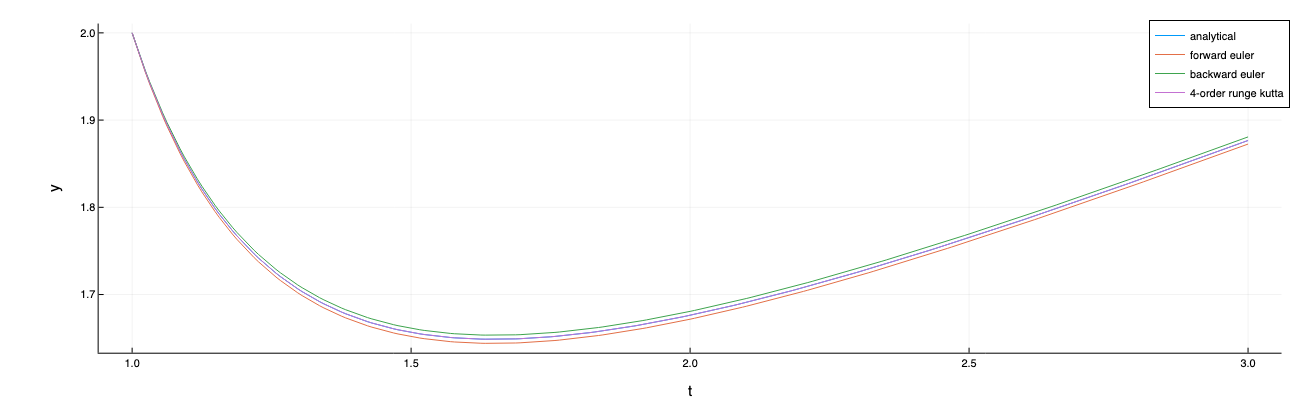

In [33]:
y(t) = 2t/(2log(t)+1)
plot(t,y.(t),label="analytical")
plot!(t,yᶠᵉ,label="forward euler")
plot!(t,yᵇᵉ,label="backward euler")
plot!(t,yʳᵏ,label="4-order runge kutta")
xlabel!("t")
ylabel!("y")